In [62]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')

In [63]:
state = pd.read_csv("data/state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [64]:
# 데이터의 간단한 통계적 특성을 보여준다.
state.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.300,6.848235e+06,563626.0,1833004.250,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.066,1.915736e+00,0.9,2.425,4.0,5.55,10.3


In [65]:
# 인구의 평균
population_mean = state['Population'].mean()

# 인구의 절사평균 - 최대값, 최소값에 10%를 제거하고 평균을 구함
population_trim_mean = scipy.stats.trim_mean(state['Population'], 0.1)

# 인구의 중위값
population_median = state['Population'].median()

print(f"Population : \nmean : {population_mean}\ntrim_mean(10%) : {population_trim_mean}\nmedian : {population_median}")

Population : 
mean : 6162876.3
trim_mean(10%) : 4783697.125
median : 4436369.5


median 보다 mean 이 큰 것으로 보아 큰 outlier이 존재함을 알 수 있다.   
또한 trim_mean(10%) 과 median이 비슷한 것으로 보아 이 outlier은 상위 10% 에 밀집해 있다는 것도 알 수 있다.

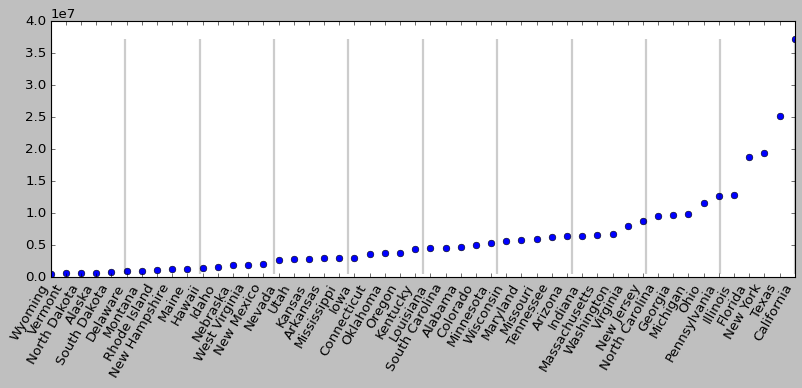

In [66]:
# 데이터를 정렬하여 10% 구간별로 나누어 살펴봄

state_sorted = state.iloc[:,:2].sort_values('Population')
plt.figure(figsize = (12,4))
plt.plot(state_sorted.State, state_sorted.Population, 'o')
plt.xticks(rotation = 60, ha = 'right')
x = plt.gca()
bounds = x.get_xbound()
plt.vlines(np.linspace(*bounds,11), min(state_sorted.Population), 
           max(state_sorted.Population),linewidth = 2, alpha = 0.2, colors = 'black')
plt.show()

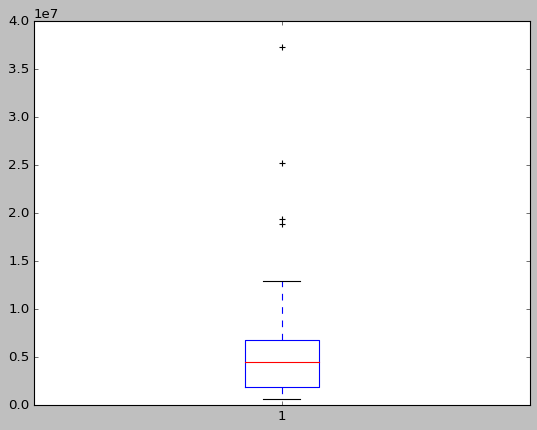

In [67]:
plt.boxplot(state.Population)
plt.show()

In [68]:
print(f"Population std : {state.Population.std() : 0.2f}")
population_IQR = state.Population.quantile(0.75) - state.Population.quantile(0.25) 
print(f"Population IQR : {population_IQR : 0.2f}")

Population std :  6848235.35
Population IQR :  4847308.00


In [69]:
# 데이터를 구간으로 나누어 각 구간에 몇개가 속하는지 확인한다.
pd.cut(state.Population, 10).value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

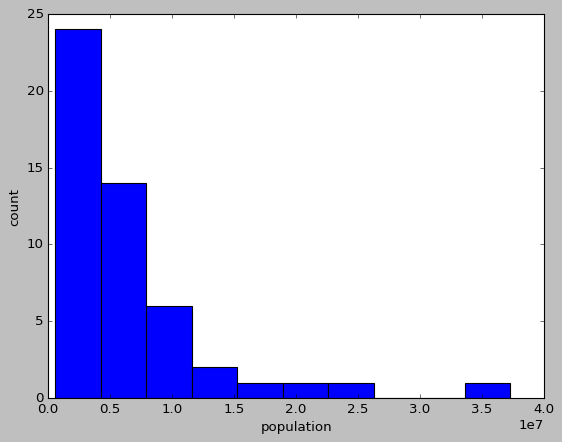

In [70]:
# 히스토그램으로 시각화한다.
plt.hist(state.Population, bins = 10)
plt.xlabel("population")
plt.ylabel("count")
plt.show()

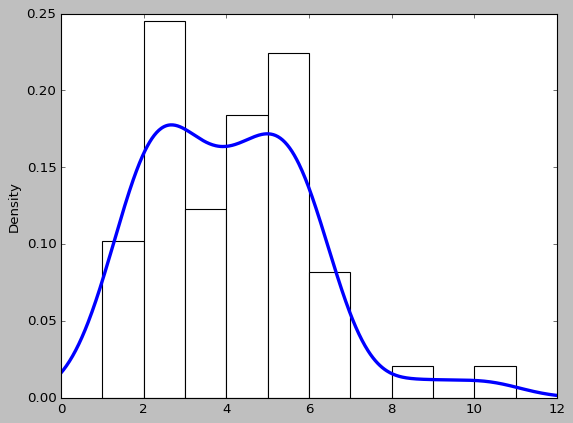

In [71]:
# 밀도 추정을 통해 왜도,첨도에 대해 시각적으로 파악할 수 있다.

plt.hist(state['Murder.Rate'], density=True, bins = range(1,12), color='w')
state['Murder.Rate'].plot.density(linewidth = 3)
plt.xlim(0,12)
plt.show()

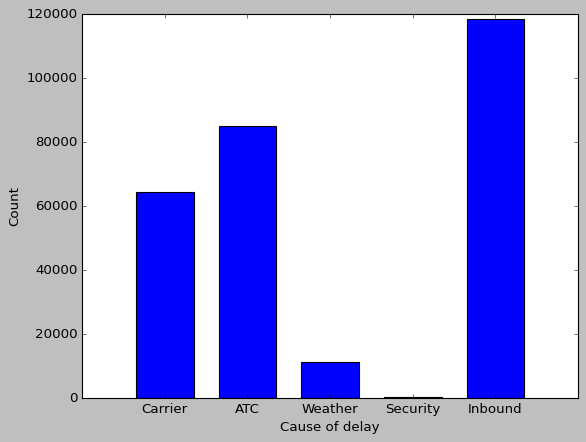

In [72]:
# 히스토그램은 데이터의 구간 별 갯수를 보여준다.
# 막대도표는 feature가 가진 데이터의 개수를 보여준다.
# 일반적으로 히스토그램은 막대가 연결되어 있고 비어있다면 그 구간은 데이터가 없다는 것을 의미한다.
# 일반적으로 막대도표는 막대가 연결되어 있지 않다. 
df = pd.read_csv('data/dfw_airline.csv')
plt.bar(df.columns, df.values[0], width=0.7)
plt.xlim(-1,5)
plt.xlabel("Cause of delay")
plt.ylabel("Count")
plt.show()

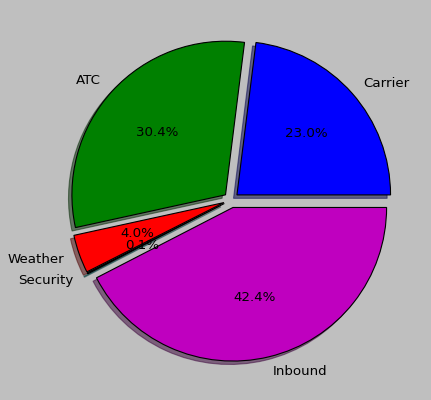

In [73]:
plt.pie(df.values[0], explode=[0.05]*5, labels = df.columns, autopct="%0.1f%%", shadow=True)
plt.show()

# 상관관계 파악

In [74]:
data = pd.read_csv("data/sp500_data.csv.gz")
data.rename(columns={"Unnamed: 0" : "date"}, inplace=True)
data.iloc[:,0] = pd.to_datetime(data.iloc[:,0], format="%Y-%m-%d")
data.set_index(keys=['date'], drop=True, inplace=True)

symbol = pd.read_csv("data/sp500_sectors.csv")
etf_symbol = symbol[symbol['sector'] == 'etf']['symbol']

etfs = data[data.index > "2012-07-12"].loc[:,etf_symbol]
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
date,,,,,,,,,,,,,,,,,
2012-07-13,0.554749,0.751261,1.778079,1.587556,0.690002,-9.920000,0.290001,0.668292,0.826819,0.612860,0.223435,0.477946,0.000000,0.390749,0.267398,0.313477,0.293214
2012-07-16,-0.075218,-0.038527,-0.009416,-0.121398,-0.219986,-2.240000,0.320000,-0.162306,0.404015,-0.038305,0.017876,-0.056226,0.000000,0.104836,-0.082985,-0.037997,-0.028375
2012-07-17,0.206854,-0.067420,0.366905,0.270819,-0.539994,-4.640000,-0.020001,-0.238677,0.432201,0.296856,0.044691,0.224913,0.000000,0.381216,0.055321,-0.018999,-0.066209
2012-07-18,0.714594,0.943887,1.251243,1.372774,0.380005,0.960000,0.209999,0.591921,0.779844,0.383040,0.134062,0.374855,0.000000,0.190610,0.018441,-0.018999,0.463466
2012-07-19,0.075218,0.250421,0.075265,0.046695,-0.349991,-3.680000,0.399997,-0.572830,-0.065770,0.181946,-0.017876,0.215542,0.019076,-0.076246,-0.110650,-0.104492,0.066209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000


<AxesSubplot:>

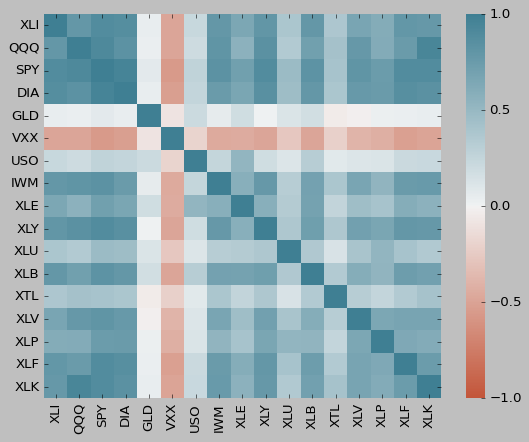

In [75]:
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap = sns.diverging_palette(20,220, as_cmap = True))

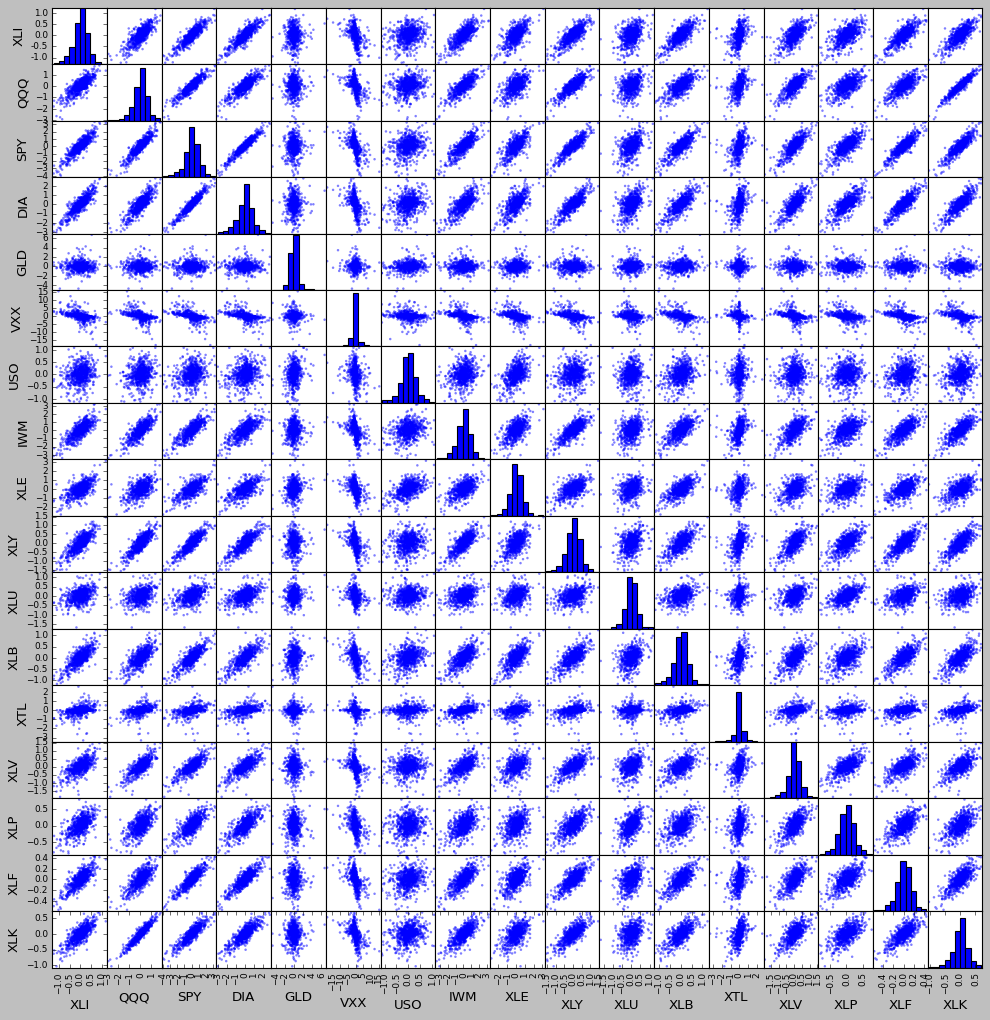

In [76]:
pd.plotting.scatter_matrix(etfs, figsize = (15,15), alpha = 0.5)
plt.show()

# Hexagonal binning (육각형 구간)
#### 2개의 변수를 갖는 3차원 히스토그램을 위에서 내려다 본 모양

In [77]:
kc_tax = pd.read_csv("data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500)]
print('kc_tax0 shape : ', kc_tax0.shape)
kc_tax0.head()

kc_tax0 shape :  (432693, 3)


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


Text(0, 0.5, 'Tax-Assessed Value')

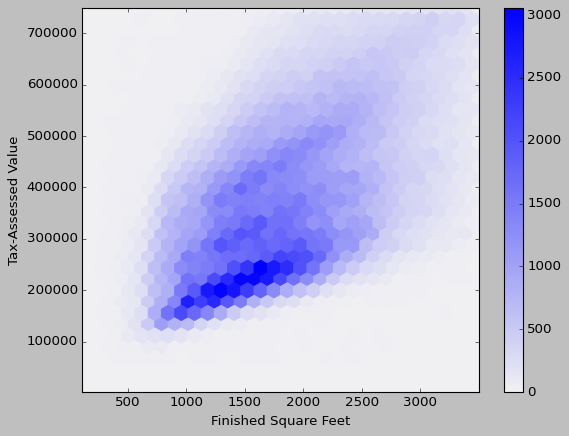

In [152]:
cmap = sns.light_palette('blue', as_cmap=True)
plt.hexbin(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, gridsize = 30, cmap = cmap)
plt.colorbar()
plt.xlabel("Finished Square Feet")
plt.ylabel("Tax-Assessed Value")

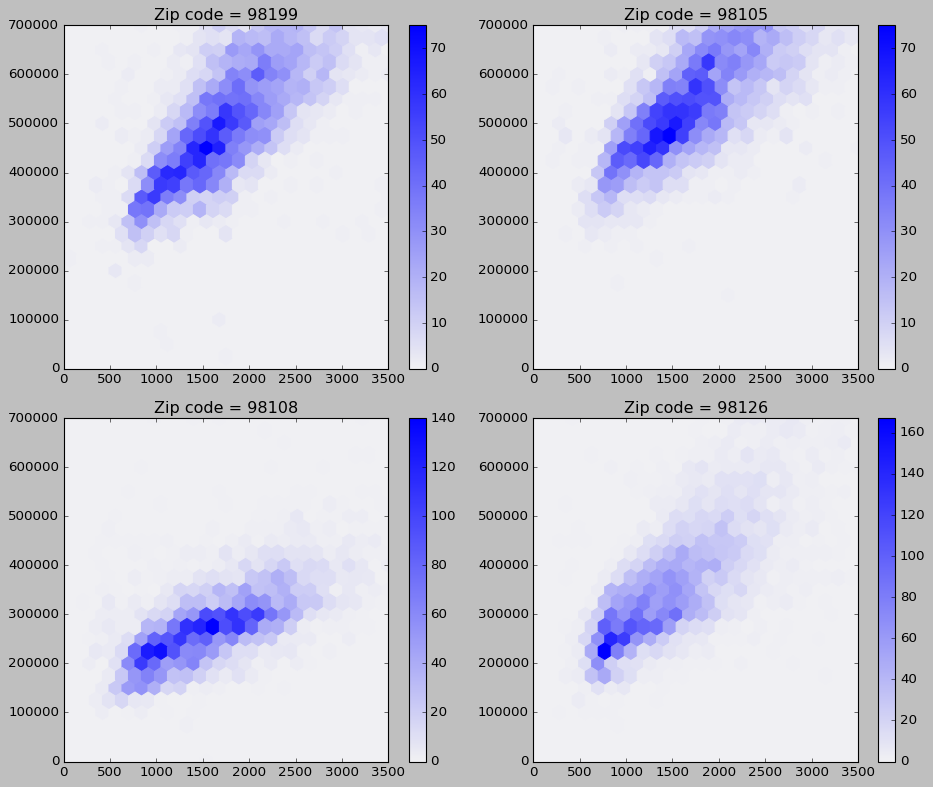

In [167]:
zip_codes = [98199, 98105, 98108, 98126]
fig, axes = plt.subplots(2,2, figsize = (12,10))

for code, ax in zip(zip_codes, axes.ravel()) :
    marker = kc_tax.ZipCode == code
    # extent를 설정하면 주어진 범위로 데이터를 한정하고 육강형을 그린다.
    # xlim,ylim은 모든 범위에서 육각형을 그리고 이를 주어진 범위로 나타낸다.
    plot = ax.hexbin(kc_tax[marker].SqFtTotLiving, kc_tax[marker].TaxAssessedValue, extent = [0,3500,0,700000], 
              gridsize = 25, cmap = cmap)
    ax.set_title(f"Zip code = {code}")
    fig.colorbar(plot, ax = ax)
plt.tight_layout()

# 범주형 대 범주형 변수

## 분할표
#### 두 범주형 변수의 도수를 보여준다.

In [80]:
lc_loan = pd.read_csv("data/lc_loans.csv")

In [81]:
# aggfunc의 작동원리
# grade 가 A 이고 cahrged off 인 데이터를 series와 비슷한 형태로 만든다.
# 이 series 의 데이터들에 함수를 적용한다.
# 따라서 문자열 데이터에는 연산형 함수를 적용할 수 없다.
# 이때 series 의 길이를 출력하는 사용자 함수를 정의하면 갯수를 구할 수 있다.

# grouby 는 index 에만 비교 기준을 두고 싶을 때,
# pivot table 은 인덱스와 칼럼에 비교 기준을 두고 싶을 때 사용하면 편하다.
closstab = lc_loan.pivot_table(index = 'grade', columns = 'status', aggfunc=lambda x : len(x), margins=True)
closstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [82]:
# 각 행의 백분율을 독립적으로 구하는 경우
# All 을 제외한 각 행의 백분율을 합하면 1이다.
df = closstab.loc['A':'G', :].copy()
df.iloc[:,:-1] = df.iloc[:,:-1].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [83]:
# 모든 행렬의 백분율을 구하는 경우
# 각 행, 열의 all을 제외한 백분율을 합하면 각 행, 열의 All 이다.
closstab / closstab.iloc[-1,-1]

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.003464,0.110987,0.045254,0.001040,0.160746
B,0.011757,0.208116,0.069097,0.004559,0.293529
C,0.013356,0.197197,0.051328,0.006158,0.268039
D,0.011103,0.118150,0.030337,0.005118,0.164708
E,0.006302,0.054637,0.013192,0.003047,0.077177
F,0.003384,0.018724,0.005162,0.001344,0.028614
G,0.000907,0.004413,0.001426,0.000441,0.007187
All,0.050273,0.712223,0.215797,0.021707,1.000000


# 범주형 대 수치형 변수
### boxplot

In [88]:
airline_stats = pd.read_csv("data/airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


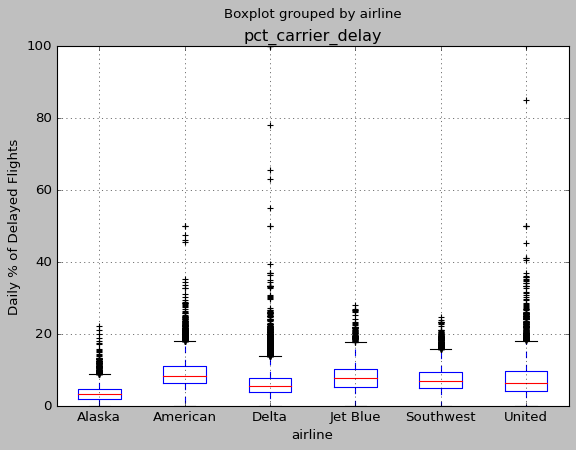

In [100]:
airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')
plt.ylabel("Daily % of Delayed Flights")
plt.show()

### Violin Plot

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


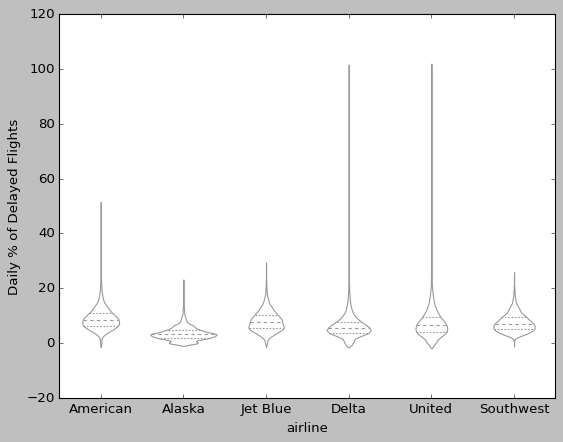

In [115]:
sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner = 'quartile', color='w')
plt.ylabel("Daily % of Delayed Flights")
plt.show()